In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
# Load the dataset
df = pd.read_csv("Mall_Customers.csv")

# Display first 5 rows
print(df.head())

# Select features for clustering (Annual Income & Spending Score)
X = df.iloc[:, [3, 4]].values


   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [3]:

# -----------------------
# Step 1: Elbow Method to determine optimal K
# -----------------------
inertia = []
K_values = range(1, 11)

for k in K_values:
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)



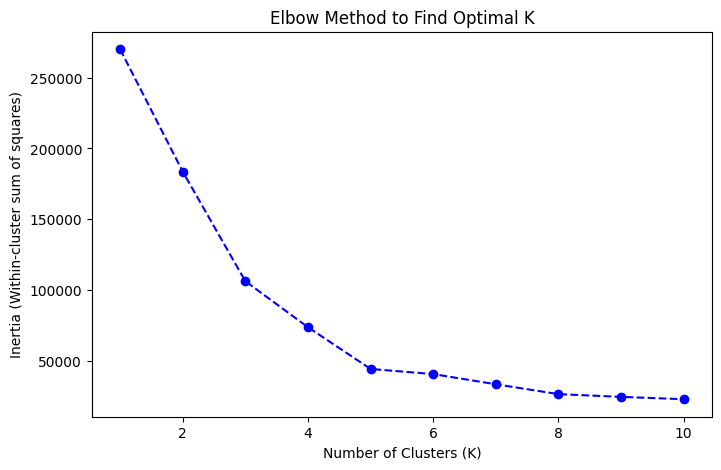

In [4]:

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K_values, inertia, marker="o", linestyle="--", color="blue")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (Within-cluster sum of squares)")
plt.title("Elbow Method to Find Optimal K")
plt.show()


In [5]:

# -----------------------
# Step 2: Apply K-Means Clustering with Optimal K
# -----------------------
optimal_k = 5  # From elbow method
kmeans = KMeans(n_clusters=optimal_k, init="k-means++", random_state=42)
y_kmeans = kmeans.fit_predict(X)  # Assign clusters to data points


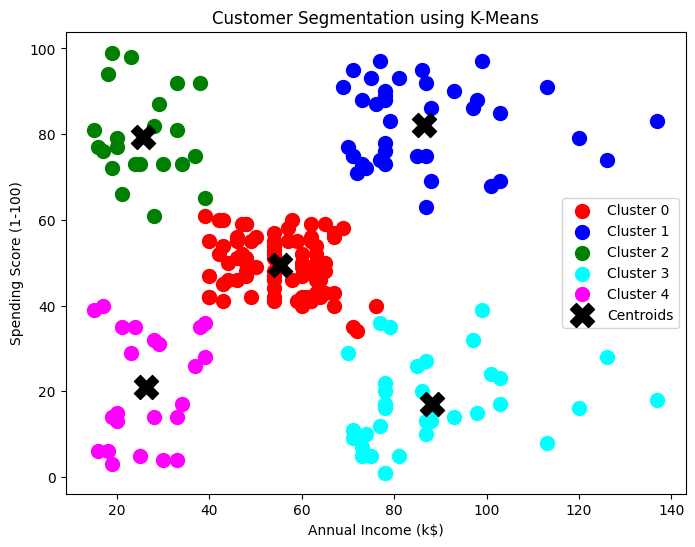

In [6]:

# -----------------------
# Step 3: Visualizing Clusters
# -----------------------
plt.figure(figsize=(8, 6))
colors = ["red", "blue", "green", "cyan", "magenta"]
for i in range(optimal_k):
    plt.scatter(X[y_kmeans == i, 0], X[y_kmeans == i, 1],
                s=100, color=colors[i], label=f"Cluster {i}")

# Plot Centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=300, color="k", marker="X", label="Centroids")

plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Customer Segmentation using K-Means")
plt.legend()
plt.show()



In [7]:
import numpy as np

# Define a new data point
new_data = np.array([[15, 39]])

# Predict the cluster for the new data point
predicted_cluster = kmeans.predict(new_data)

print(f"The new data point {new_data[0]} belongs to Cluster {predicted_cluster[0]}")


The new data point [15 39] belongs to Cluster 4


In [8]:
print(f"Inertia: {kmeans.inertia_}")


Inertia: 44448.4554479337


In [9]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(X, kmeans.labels_)
print(f"Silhouette Score: {sil_score:.2f}")


Silhouette Score: 0.55


In [10]:
from sklearn.metrics import davies_bouldin_score

db_score = davies_bouldin_score(X, kmeans.labels_)
print(f"Davies-Bouldin Index: {db_score:.2f}")


Davies-Bouldin Index: 0.57


# **HIERARCHIAL CLUSTERING**

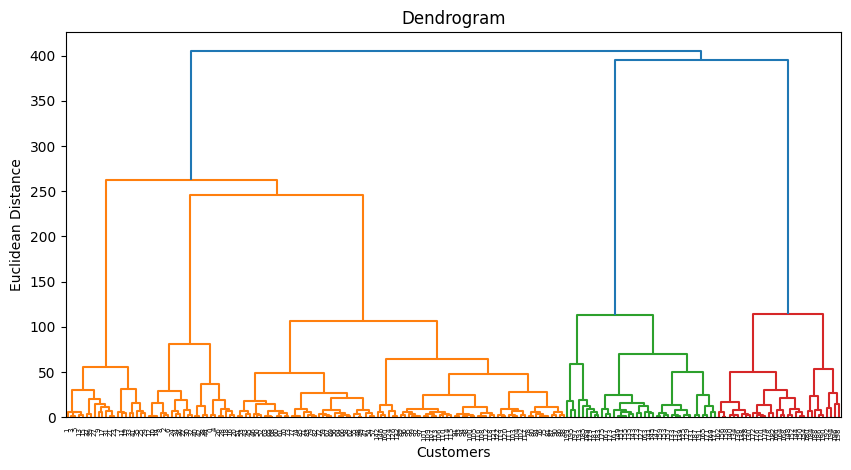

In [11]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

plt.figure(figsize=(10, 5))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()


In [12]:
hc = AgglomerativeClustering(n_clusters=3)
y_hc = hc.fit_predict(X)


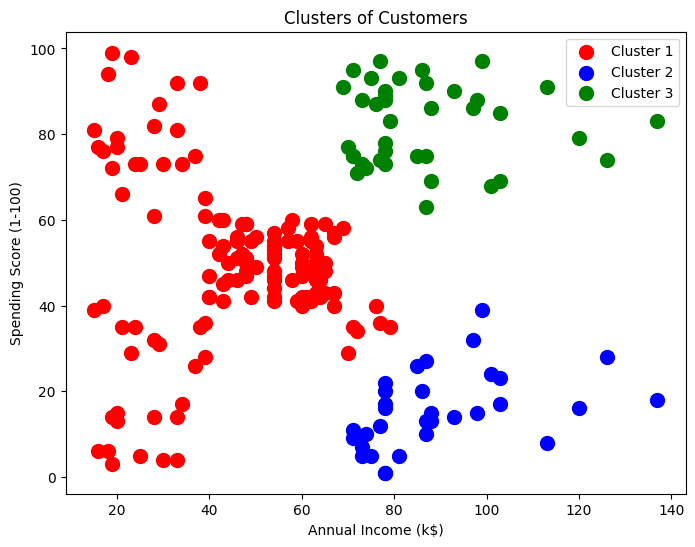

In [13]:
import matplotlib.pyplot as plt

# Define colors for clusters
colors = ["red", "blue", "green", "cyan", "magenta"]

# Plot clusters dynamically
plt.figure(figsize=(8, 6))
for i in range(3):  # Number of unique clusters
    plt.scatter(X[y_hc == i, 0], X[y_hc == i, 1],
                s=100, color=colors[i], label=f"Cluster {i+1}")

# Add titles and labels
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


In [14]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X, y_hc)
print(f"Silhouette Score: {score:.3f}")


Silhouette Score: 0.462


In [15]:
from sklearn.metrics import davies_bouldin_score

db_score = davies_bouldin_score(X, y_hc)
print(f"Davies-Bouldin Index: {db_score:.3f}")


Davies-Bouldin Index: 0.707


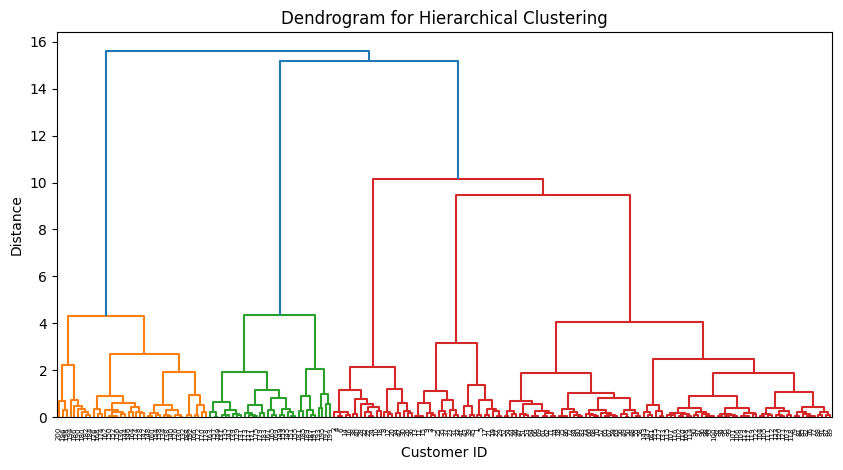

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        3  
1        3  
2        3  
3        3  
4        3  


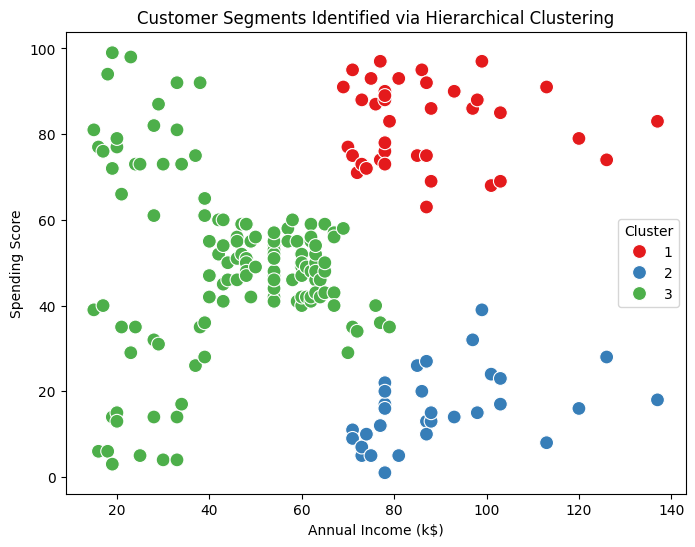

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.preprocessing import StandardScaler

# 🔹 Step 1: Load Real-Life Data

df = pd.read_csv('Mall_Customers.csv')

# 🔹 Step 2: Select Features for Clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# 🔹 Step 3: Normalize the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 🔹 Step 4: Compute the Linkage Matrix
linked = linkage(X_scaled, method='ward')

# 🔹 Step 5: Plot Dendrogram to Decide Number of Clusters
plt.figure(figsize=(10, 5))
dendrogram(linked, labels=df["CustomerID"].values, leaf_rotation=90)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Customer ID")
plt.ylabel("Distance")
plt.show()

# 🔹 Step 6: Extract Cluster Labels (Choose Number of Clusters)
num_clusters = 3
clusters = fcluster(linked, num_clusters, criterion='maxclust')

# 🔹 Step 7: Add Cluster Labels to Data & Display
df["Cluster"] = clusters
print(df.head())

# 🔹 Step 8: Visualize Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["Annual Income (k$)"], y=df["Spending Score (1-100)"], hue=df["Cluster"], palette="Set1", s=100)
plt.title("Customer Segments Identified via Hierarchical Clustering")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score")
plt.legend(title="Cluster")
plt.show()


Silhouette Score: 0.7548804126647896


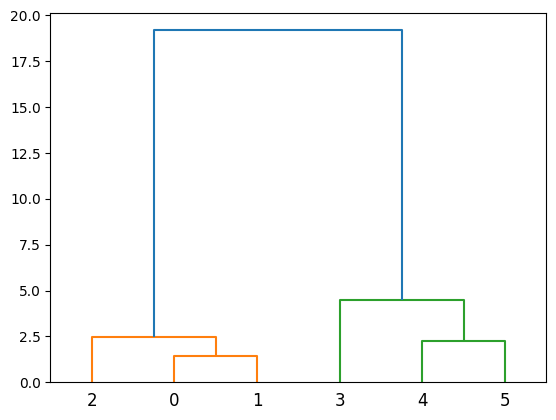

In [17]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
import numpy as np
import matplotlib.pyplot as plt

# Sample dataset
X = np.array([[1, 2], [2, 3], [3, 4], [8, 9], [10, 11], [11, 13]])

# Hierarchical Clustering using Ward's Method
hc = AgglomerativeClustering(n_clusters=2, linkage='ward')
labels = hc.fit_predict(X)

# Compute Silhouette Score (Cluster Quality)
score = silhouette_score(X, labels)
print("Silhouette Score:", score)

# Plot Dendrogram
Z = linkage(X, method='ward')
dendrogram(Z)
plt.show()


# DBSCAN Clustering

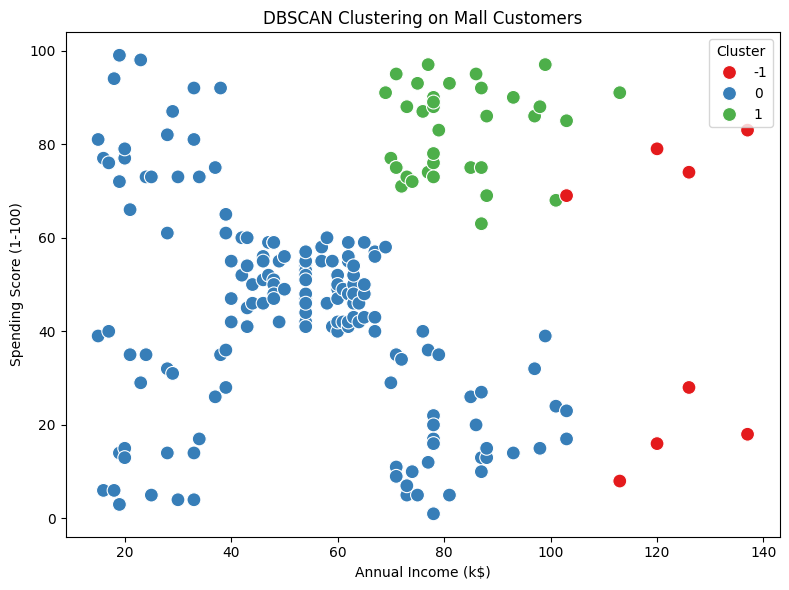

In [21]:
from sklearn.cluster import DBSCAN
# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['Cluster'] = dbscan.fit_predict(X_scaled)

# Plot the result
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'],
                hue=df['Cluster'], palette='Set1', s=100)
plt.title('DBSCAN Clustering on Mall Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()


In [22]:
from sklearn.metrics import silhouette_score

# Get predicted labels
labels = dbscan.labels_

# Check number of clusters (excluding noise)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

if n_clusters > 1:
    score = silhouette_score(X_scaled, labels)
    print(f"Silhouette Score: {score:.3f}")
else:
    print("Silhouette Score cannot be computed (only one cluster or all noise).")


Silhouette Score: 0.350
